<a href="https://colab.research.google.com/github/VegetaSan1/Machine-Learning-Projects/blob/main/SPAM_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
ds=pd.read_csv('amazon_alexa.tsv',sep='\t')
ds

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
ds.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
ds.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

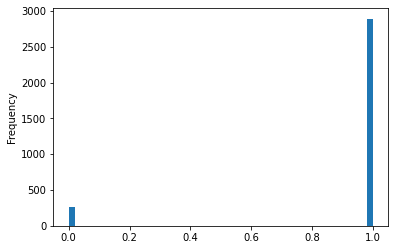

In [ ]:
ds['feedback'].plot(bins=50, kind='hist')

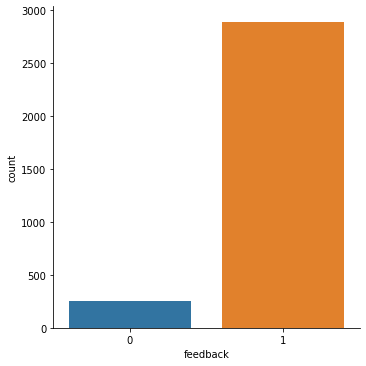

In [ ]:
import seaborn as sns
sns.catplot(x="feedback", kind="count", data=ds)

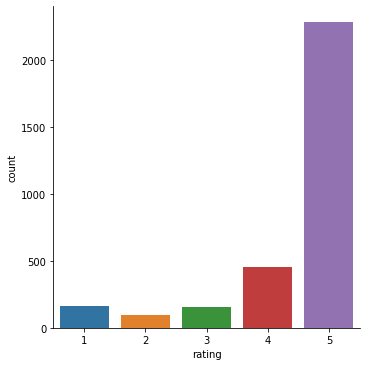

In [ ]:
sns.catplot(x="rating", kind="count", data=ds)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(ds)):
    review = re.sub('[^a-zA-Z]', ' ',ds['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()

In [ ]:
x[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y=ds.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# ***MULTINOMIAL NAIVE BAYES***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb.score(x_train, y_train)

0.9578231292517007

In [ ]:
y_pred=mnb.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 29,  46],
       [ 13, 857]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50        75
           1       0.95      0.99      0.97       870

    accuracy                           0.94       945
   macro avg       0.82      0.69      0.73       945
weighted avg       0.93      0.94      0.93       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9375661375661376

In [ ]:
f1=f1_score(y_test,y_pred)
f1

0.9667230682459109

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.9490586932447398

In [ ]:
recall=recall_score(y_test,y_pred)
recall

0.9850574712643678

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


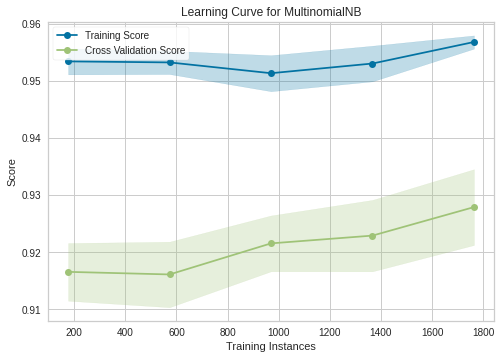

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(mnb,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


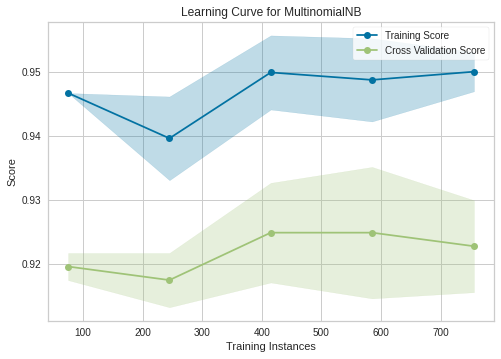

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(mnb,x_test,y_test)
vis

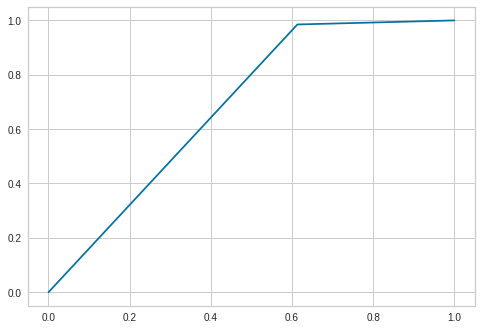

AUC: 0.6858620689655173


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.show() 
# Print AUC
auc = np.trapz(fpr,tpr)
print('AUC:', auc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9758699754944089

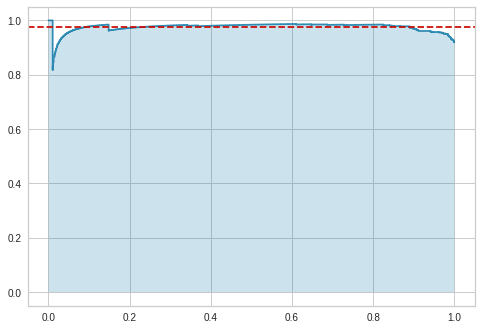

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(mnb)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
from sklearn.metrics import log_loss  
log_loss(y_test,y_pred)

2.1564281362767406

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=mnb,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:92.93%


# ***RANDOM FOREST CLASSIFIER***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=75,criterion ='gini',random_state = 0)
rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)

0.9927437641723356

In [ ]:
y_pred1=rfr.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm1=confusion_matrix(y_test,y_pred1)
cm1

array([[ 22,  53],
       [  2, 868]])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.29      0.44        75
           1       0.94      1.00      0.97       870

    accuracy                           0.94       945
   macro avg       0.93      0.65      0.71       945
weighted avg       0.94      0.94      0.93       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.9417989417989417

In [ ]:
f1=f1_score(y_test,y_pred1)
f1

0.96929089893914

In [ ]:
precision=precision_score(y_test,y_pred1)
precision

0.9424538545059717

In [ ]:
recall=recall_score(y_test,y_pred1)
recall

0.9977011494252873

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


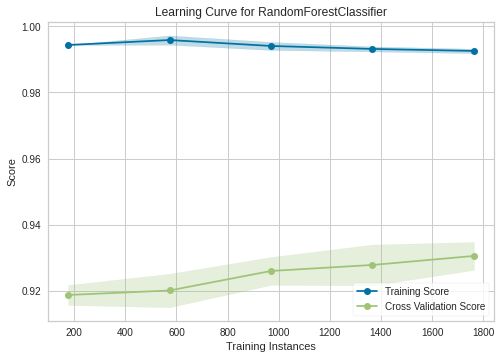

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(rfr,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


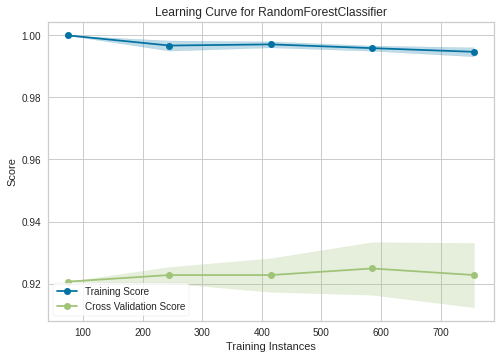

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(rfr,x_test,y_test)
vis

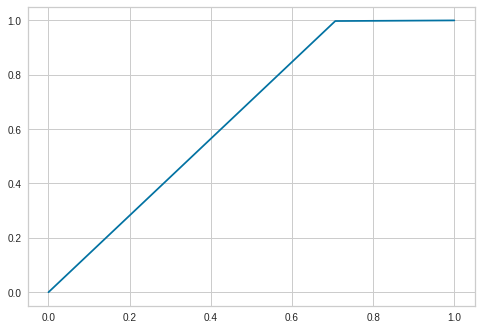

AUC: 0.6455172413793103


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred1,pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.show() 
# Print AUC
auc = np.trapz(fpr,tpr)
print('AUC:', auc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9888306083559257

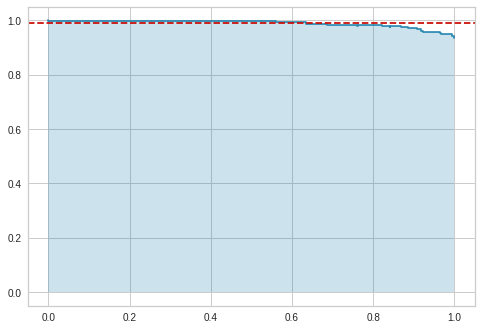

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(rfr)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)


In [ ]:
log_loss(y_test,y_pred1)

2.0102381803004112

In [ ]:
accuracies=cross_val_score(estimator=rfr,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:93.56%


# ***LOGISTIC REGRESSION***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9755102040816327

In [ ]:
y_pred2=lr.predict(x_test)
y_pred2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm1=confusion_matrix(y_test,y_pred2)
cm1

array([[ 22,  53],
       [  8, 862]])

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.29      0.42        75
           1       0.94      0.99      0.97       870

    accuracy                           0.94       945
   macro avg       0.84      0.64      0.69       945
weighted avg       0.93      0.94      0.92       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred2)
accuracy

0.9354497354497354

In [ ]:
f1=f1_score(y_test,y_pred2)
f1

0.9658263305322129

In [ ]:
precision=precision_score(y_test,y_pred2)
precision

0.9420765027322404

In [ ]:
recall=recall_score(y_test,y_pred2)
recall

0.9908045977011494

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


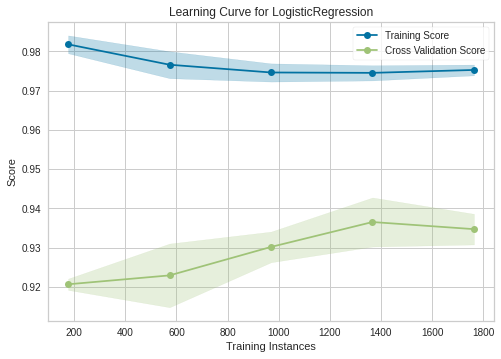

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(lr,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


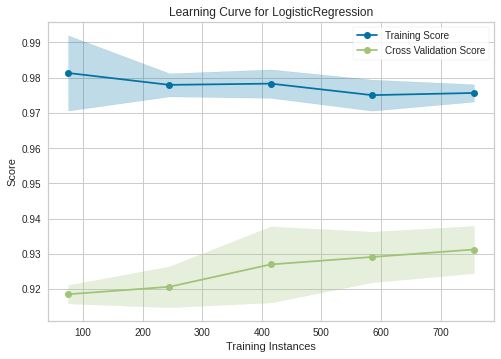

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(lr,x_test,y_test)
vis

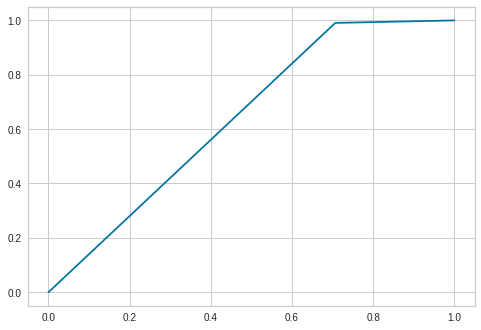

AUC: 0.6420689655172414


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred2,pos_label=0)
# Print ROC curve
plt.plot(tpr,fpr)
plt.show() 
# Print AUC
auc = np.trapz(fpr,tpr)
print('AUC:', auc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9849369190348397

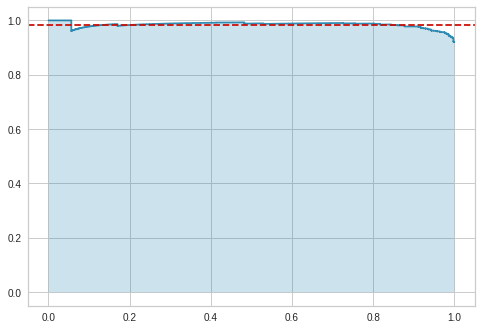

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(lr)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)


In [ ]:
log_loss(y_test,y_pred2)

2.2295319986807964

In [ ]:
accuracies=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:93.61%


# ***DECISION TREE***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=10,splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.9541950113378684

In [ ]:
y_pred3=dt.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm1=confusion_matrix(y_test,y_pred3)
cm1

array([[ 16,  59],
       [  8, 862]])

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.21      0.32        75
           1       0.94      0.99      0.96       870

    accuracy                           0.93       945
   macro avg       0.80      0.60      0.64       945
weighted avg       0.91      0.93      0.91       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred3)
accuracy

0.9291005291005291

In [ ]:
f1=f1_score(y_test,y_pred3)
f1

0.9625907314349526

In [ ]:
precision=precision_score(y_test,y_pred3)
precision

0.9359391965255157

In [ ]:
recall=recall_score(y_test,y_pred3)
recall

0.9908045977011494

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


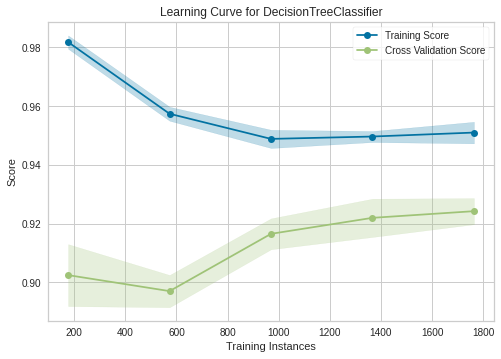

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(dt,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


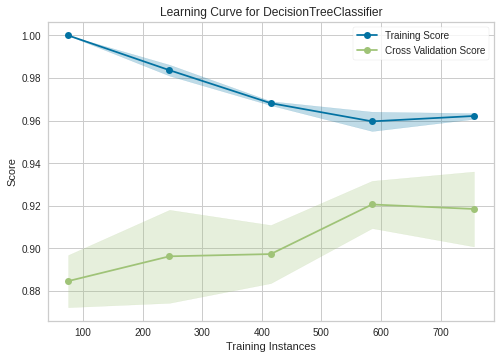

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(dt,x_test,y_test)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ae5c9ed0>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

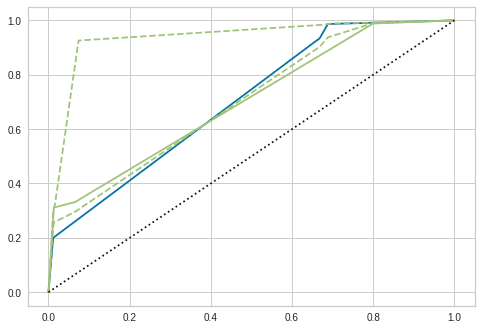

In [ ]:
from yellowbrick.classifier import ROCAUC
vis= ROCAUC(dt)
vis.fit(x_train,y_train)       
vis.score(x_test, y_test)
vis   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9546741015099864

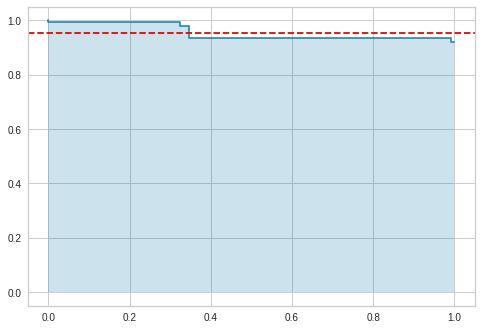

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(dt)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)


In [ ]:
log_loss(y_test,y_pred3)

2.4488308938702628

In [ ]:
accuracies=cross_val_score(estimator=dt,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:92.65%


# ***NAIEVE BAYES***



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=0.1)
nb.fit(x_train,y_train)
nb.score(x_train,y_train)

0.9242630385487528

In [ ]:
y_pred5=nb.predict(x_test)
y_pred5

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm1=confusion_matrix(y_test,y_pred5)
cm1

array([[  9,  66],
       [  9, 861]])

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        75
           1       0.93      0.99      0.96       870

    accuracy                           0.92       945
   macro avg       0.71      0.55      0.58       945
weighted avg       0.89      0.92      0.90       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred5)
accuracy

0.9206349206349206

In [ ]:
f1=f1_score(y_test,y_pred5)
f1

0.9582637729549247

In [ ]:
precision=precision_score(y_test,y_pred5)
precision

0.9288025889967637

In [ ]:
recall=recall_score(y_test,y_pred5)
recall

0.9896551724137931

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


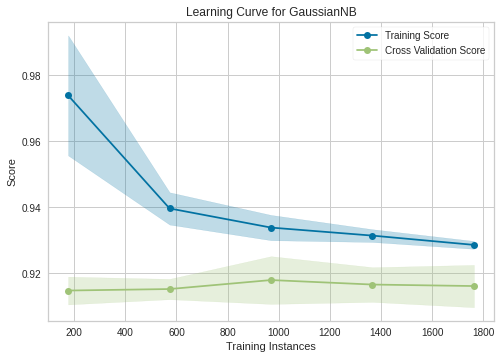

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(nb,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


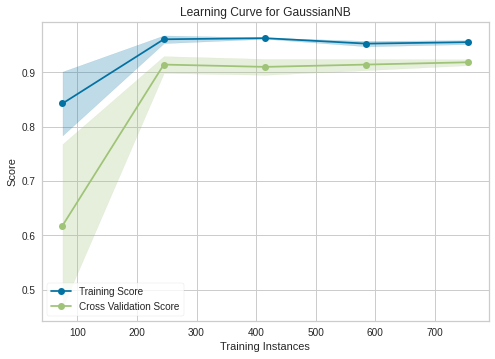

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(nb,x_test,y_test)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ae43b390>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

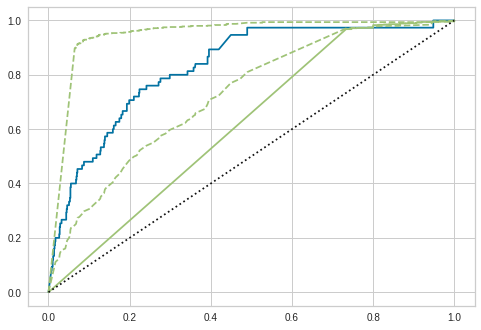

In [ ]:
from yellowbrick.classifier import ROCAUC
vis= ROCAUC(nb)
vis.fit(x_train,y_train)       
vis.score(x_test, y_test)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9384241037824793

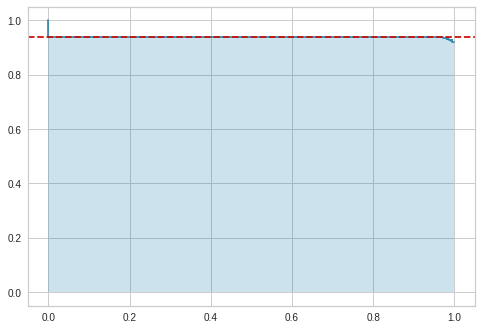

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(nb)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
log_loss(y_test,y_pred5)

2.7412285746547034

In [ ]:
accuracies=cross_val_score(estimator=nb,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:91.75%


# ***SUPPORT VECTOR MACHINES***

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=0.9, kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)

0.9873015873015873

In [ ]:
y_pred4=svc.predict(x_test)
y_pred4

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix,f1_score
cm1=confusion_matrix(y_test,y_pred4)
cm1

array([[ 32,  43],
       [ 22, 848]])

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        75
           1       0.95      0.97      0.96       870

    accuracy                           0.93       945
   macro avg       0.77      0.70      0.73       945
weighted avg       0.92      0.93      0.93       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred4)
accuracy

0.9312169312169312

In [ ]:
f1=f1_score(y_test,y_pred4)
f1

0.9630891538898354

In [ ]:
precision=precision_score(y_test,y_pred4)
precision

0.9517396184062851

In [ ]:
recall=recall_score(y_test,y_pred4)
recall

0.9747126436781609

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


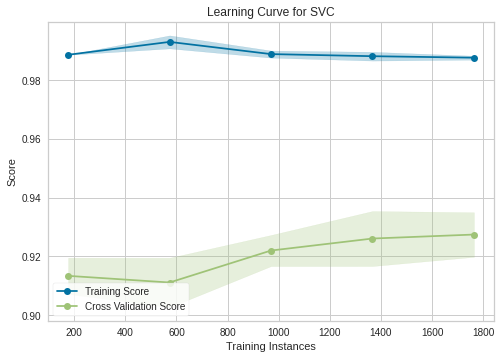

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(svc,x_train,y_train)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


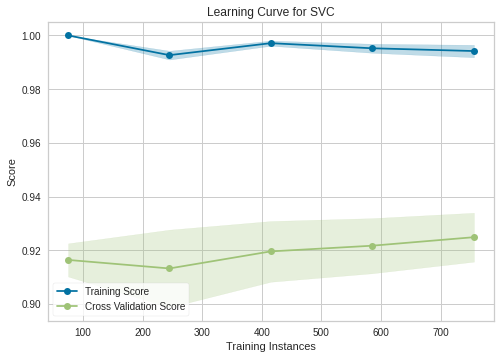

In [ ]:
from yellowbrick.model_selection import learning_curve
vis=learning_curve(svc,x_test,y_test)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f24ae227290>,
       classes=None, macro=False, micro=False, model=None, per_class=False)

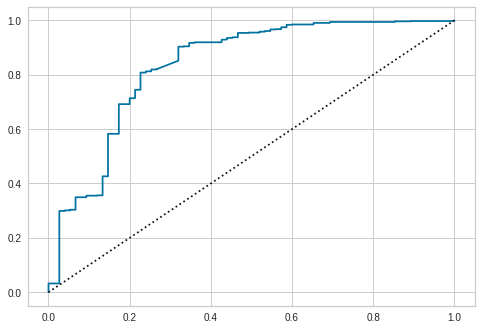

In [ ]:
from yellowbrick.classifier import ROCAUC
vis= ROCAUC(svc, micro=False, macro=False,per_class=False)
vis.fit(x_train,y_train)       
vis.score(x_test, y_test)
vis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


0.9757221389379741

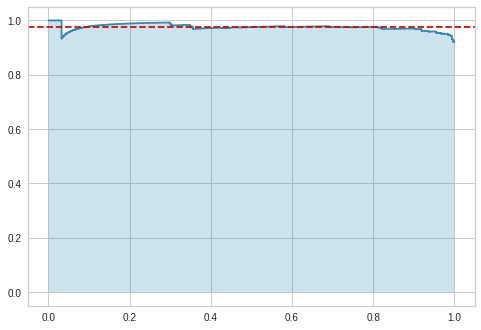

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(svc)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)

In [ ]:
log_loss(y_test,y_pred4)

2.375719416252586

In [ ]:
accuracies=cross_val_score(estimator=svc,X=x_train,y=y_train,cv=8)
print("accuracies:{:.2f}%".format(accuracies.mean()*100))

accuracies:93.29%


# ***RNN_LSTM***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
voc_size=5000
sent_length=20
embedding_vector_features=40

one_hot=[one_hot(words,voc_size)for words in corpus] 
one_hot

[[4761, 750],
 [4761],
 [4985,
  1711,
  4924,
  3433,
  2271,
  1532,
  2041,
  4553,
  4174,
  3723,
  3433,
  591,
  3544,
  1366,
  274,
  1543,
  4926],
 [2795,
  1196,
  783,
  1076,
  113,
  1769,
  1650,
  1679,
  274,
  1711,
  4924,
  591,
  3734,
  3892,
  2624,
  1711,
  4699,
  1531],
 [4699],
 [3181,
  750,
  2475,
  2840,
  1129,
  2448,
  3700,
  1711,
  4699,
  766,
  1681,
  2948,
  3304,
  3965,
  3015,
  4539,
  1389],
 [3055,
  3342,
  3801,
  2420,
  3135,
  190,
  8,
  4539,
  2420,
  4312,
  10,
  96,
  1552,
  2638,
  2506,
  4781,
  10,
  4686,
  1140,
  1019,
  2746,
  2908,
  4128,
  1196,
  540,
  830,
  2271,
  4781,
  2024,
  1547,
  3889,
  3348,
  318],
 [631,
  4920,
  1086,
  4903,
  2710,
  4587,
  1086,
  4740,
  1019,
  3556,
  3139,
  591,
  190,
  1056,
  338,
  1711,
  4699,
  750,
  1679,
  274,
  1630,
  3556],
 [1534, 4312],
 [4761, 28, 403, 4745, 446, 2846, 4587, 690, 3451, 724, 4312],
 [2669, 1421, 113, 374, 4212, 740],
 [4761,
  1769,
  32

In [ ]:
len(one_hot)

3150

In [ ]:
embed=pad_sequences(one_hot,padding='post',maxlen=sent_length)
print(embed)

[[4761  750    0 ...    0    0    0]
 [4761    0    0 ...    0    0    0]
 [4985 1711 4924 ...    0    0    0]
 ...
 [4234 3551 3304 ... 4119 3304 3800]
 [1711 4699 3090 ... 1973  375 3965]
 [ 697    0    0 ...    0    0    0]]


In [ ]:
len(embed)

3150

In [ ]:
x_train=np.array(embed)
y_train=np.array(y)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3150, 20)
(3150,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.3,random_state=0)

In [ ]:
lstm=Sequential()
lstm.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
lstm.add(LSTM(units=50,return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1))

In [ ]:
lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
lstm.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
69/69 [==============================] - 6s 38ms/step - loss: 1.9841 - accuracy: 0.5567 - val_loss: 0.7602 - val_accuracy: 0.9206
Epoch 2/30
69/69 [==============================] - 2s 26ms/step - loss: 0.6331 - accuracy: 0.8323 - val_loss: 0.8353 - val_accuracy: 0.9206
Epoch 3/30
69/69 [==============================] - 2s 26ms/step - loss: 0.6218 - accuracy: 0.9298 - val_loss: 0.6617 - val_accuracy: 0.9238
Epoch 4/30
69/69 [==============================] - 2s 26ms/step - loss: 0.5117 - accuracy: 0.9094 - val_loss: 0.5351 - val_accuracy: 0.9344
Epoch 5/30
69/69 [==============================] - 2s 26ms/step - loss: 0.2736 - accuracy: 0.9576 - val_loss: 0.5269 - val_accuracy: 0.9354
Epoch 6/30
69/69 [==============================] - 2s 27ms/step - loss: 0.2933 - accuracy: 0.9658 - val_loss: 0.4179 - val_accuracy: 0.9185
Epoch 7/30
69/69 [==============================] - 2s 27ms/step - loss: 0.2172 - accuracy: 0.9590 - val_loss: 0.4108 - val_accuracy: 0.8815
Epoch 8/30
69

In [ ]:
print(lstm.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 40)            200000    
_________________________________________________________________
lstm_32 (LSTM)               (None, 20, 50)            18200     
_________________________________________________________________
dropout_31 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_32 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 238,451
Trainable params: 238,451
Non-trainable params: 0
_______________________________________________

In [ ]:
y_pred6=lstm.predict_classes(x_test)
y_pred6

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
confusion_matrix(y_test,y_pred6)

array([[ 27,  48],
       [ 18, 852]])

In [ ]:
accuracy_score(y_test,y_pred6)

0.9301587301587302

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45        75
           1       0.95      0.98      0.96       870

    accuracy                           0.93       945
   macro avg       0.77      0.67      0.71       945
weighted avg       0.92      0.93      0.92       945



In [ ]:
accuracy=accuracy_score(y_test,y_pred6)
accuracy

0.9301587301587302

In [ ]:
f1=f1_score(y_test,y_pred6)
f1

0.9627118644067797

In [ ]:
precision=precision_score(y_test,y_pred6)
precision

0.9466666666666667

In [ ]:
recall=recall_score(y_test,y_pred6)
recall

0.9793103448275862

In [ ]:
log_loss(y_test,y_pred6)

2.4122726166568835